In [ ]:
import numpy as np
import matplotlib.pyplot as plt

N = 1024
M = 4
noise = np.random.randn(N*20)

In [ ]:
#ローパスフィルターのサンプル関数
def low_filter(M, signal):
  lf = np.linspace(0,M,M)
  lf = np.power(0.9,lf)
  #lf = np.array([0.9, 0.09, 0.009, 0.009])
  nl = np.convolve(signal, lf, mode='same')

  nl = (nl/max(nl))*max(signal)
  return nl

In [ ]:
nl = low_filter(M, noise)
nl2 = low_filter(M, nl)

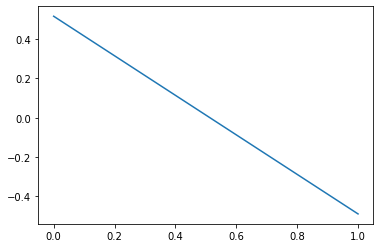

In [ ]:
#lfの振幅特性
lf = np.linspace(0,M,M)
lf = np.power(0.9,lf)
lf_fft = np.fft.fft(lf)
lf_abs = np.abs(lf_fft)

plt.plot(np.log10(lf_abs[0:int(M/2)]))

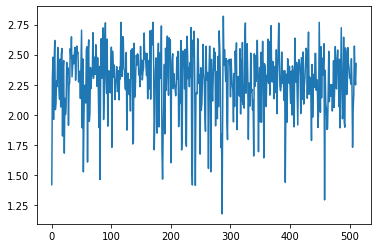

In [ ]:
#lfを通したnoiseの振幅特性
nl_fft = np.fft.fft(nl)
nl_abs = np.abs(nl_fft)

plt.plot(np.log10(nl_abs[0:int(N/2)]))

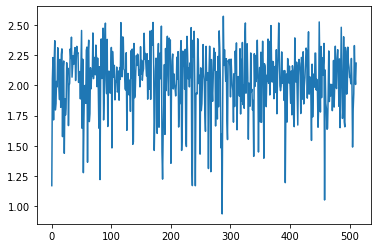

In [ ]:
#元の雑音の振幅特性
noise_fft = np.fft.fft(noise)
noise_abs = np.abs(noise_fft)

plt.plot(np.log10(noise_abs[0:int(N/2)]))

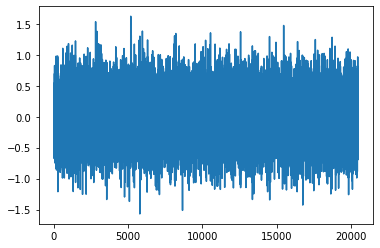

In [ ]:
nc = nl-nl2
plt.plot(nc)

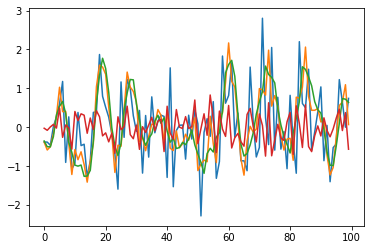

In [ ]:
plt.plot(noise[0:100])#元雑音 青
plt.plot(nl[0:100])#low_filter 1回　オレンジ
plt.plot(nl2[0:100])#low_filter 2回　緑
plt.plot(nc[0:100])#nl-nl2　赤